In [1]:
import geopandas as gpd

europe = gpd.read_file('europe_lowres.shp')

europe.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
1,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
2,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
3,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
4,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."


In [2]:
import rasterio

dataset = rasterio.open('gpcc_precip_2018_11.tif')

print(dataset.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.9921875, 'width': 1440, 'height': 720, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.25, 0.0, -180.0,
       0.0, -0.25, 90.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [3]:
print(dataset.crs)
print(europe.crs)

EPSG:4326
{'init': 'epsg:4326'}


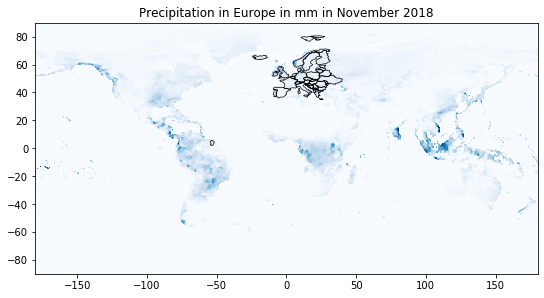

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

fig, ax = plt.subplots(1, figsize=(9, 7))

show((dataset, 1), cmap='Blues', ax=ax, vmin=0, vmax=800)

europe.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

plt.title("Precipitation in Europe in mm in November 2018")

plt.show()

In [5]:
from rasterstats import zonal_stats

zs = zonal_stats('europe_lowres.shp', 'gpcc_precip_2018_11.tif', stats=['mean','sum','range'], all_touched=True)

print(zs)

[{'mean': 91.65589387464388, 'sum': 160856.09375, 'range': 616.1400241851807}, {'mean': 71.9808385019084, 'sum': 94294.8984375, 'range': 230.8699951171875}, {'mean': 68.82520161290323, 'sum': 96011.15625, 'range': 145.4700050354004}, {'mean': 75.82879356971154, 'sum': 39430.97265625, 'range': 74.13999938964844}, {'mean': 69.48712177579365, 'sum': 87553.7734375, 'range': 226.55000686645508}, {'mean': 64.85654874484182, 'sum': 47150.7109375, 'range': 176.1599998474121}, {'mean': 44.79962671582944, 'sum': 9587.1201171875, 'range': 150.08999633789062}, {'mean': 30.730187136627908, 'sum': 6606.990234375, 'range': 69.26999807357788}, {'mean': 68.46577690972222, 'sum': 6161.919921875, 'range': 84.8800048828125}, {'mean': 73.00171190239044, 'sum': 36646.859375, 'range': 194.9500026702881}, {'mean': 86.53078081354748, 'sum': 15489.009765625, 'range': 80.64999771118164}, {'mean': 71.31284436677632, 'sum': 13549.4404296875, 'range': 83.78000259399414}, {'mean': 61.98021248891844, 'sum': 8739.2099

In [6]:
import pandas as pd

rainstats_df = pd.DataFrame(zs)

rainstats_df.rename(columns={'mean':'mean_rainfall','sum':'sum_rainfall', 'range':'delta_rainfall'}, inplace=True)

europe = pd.concat([europe, rainstats_df], axis=1)

europe.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall
25,62137802,Europe,Italy,ITA,2221000.0,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",47.715458,33400.820312,266.269989
24,5011102,Europe,Ireland,IRL,322000.0,"POLYGON ((-6.19788 53.86757, -6.03299 53.15316...",184.742904,29189.378906,250.760002
8,3474121,Europe,Moldova,MDA,18540.0,"POLYGON ((26.61934 48.22073, 26.85782 48.36821...",68.465777,6161.919922,84.880005
29,1972126,Europe,Slovenia,SVN,68350.0,"POLYGON ((13.80648 46.50931, 14.63247 46.43182...",43.026898,2495.560059,68.349998
37,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",89.946282,3148.119873,99.079994


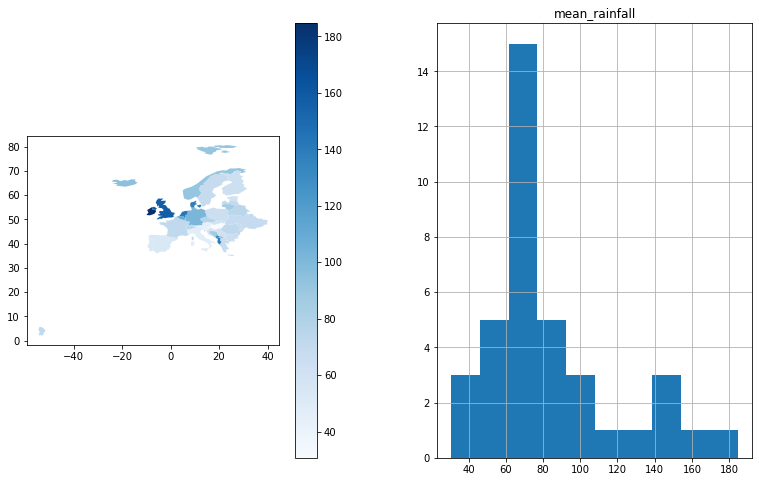

In [7]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="mean_rainfall", cmap="Blues", legend=True)

europe.hist(ax=ax_hist, column="mean_rainfall")

plt.title("mean_rainfall")

plt.show()

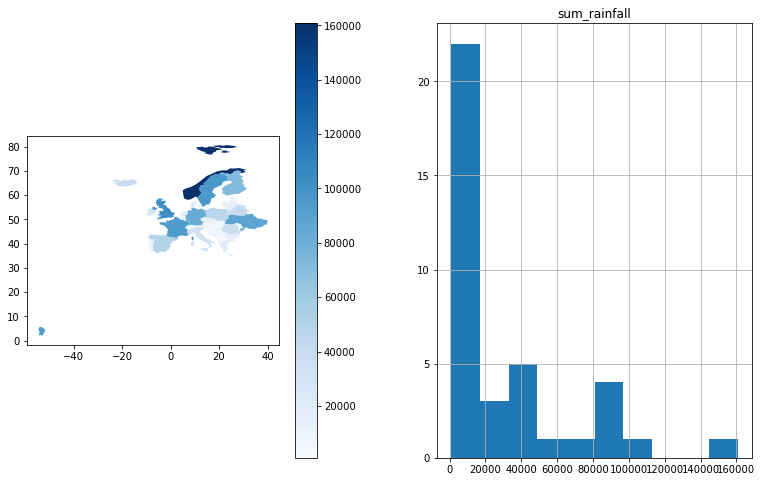

In [8]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="sum_rainfall", cmap="Blues", legend=True)

europe.hist(ax=ax_hist, column="sum_rainfall")

plt.title("sum_rainfall")

plt.show()

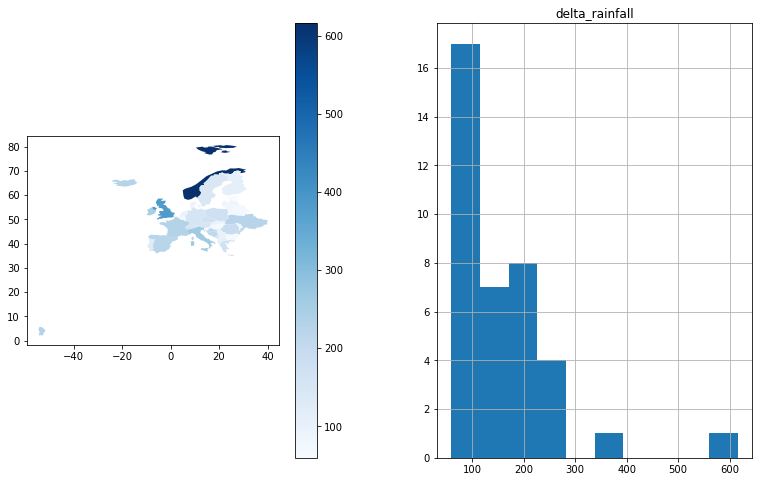

In [9]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="delta_rainfall", cmap="Blues", legend=True)

europe.hist(ax=ax_hist, column="delta_rainfall")

plt.title("delta_rainfall")

plt.show()

In [12]:
europe_3035 = europe.to_crs(epsg=3035)

europe_3035['area_km2'] = europe_3035.area / 1000

europe_3035['average_precip_km2'] = europe_3035.apply(lambda x: x['sum_rainfall'] / x['area_km2'], axis=1)

In [13]:
europe_3035.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall,area_km2,average_precip_km2
16,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((5250878.030 2039389.752, 5253070.321...",139.751211,10481.340820,112.160004,2.969486e+07,0.000353
12,1251581,Europe,Estonia,EST,38700.0,"POLYGON ((5329721.623 4170301.744, 5329721.346...",61.980212,8739.209961,59.709999,4.467593e+07,0.000196
20,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((4050204.577 3084019.875, 4038189.659...",109.080125,9162.730469,72.610001,3.012566e+07,0.000304
34,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((5339820.976 2219012.193, 5386224.141...",69.399323,4094.560059,118.450001,2.506166e+07,0.000163
7,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((5211292.914 2885256.597, 5256777.156...",30.730187,6606.990234,69.269998,9.247413e+07,0.000071


In [14]:
import pysal.viz.mapclassify as mc

# Define the number of classes
n_classes = 5

C:\dev\conda3\envs\geopy2019\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\dev\conda3\envs\geopy2019\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [15]:
# Create a Natural Breaks classifier
classifier = mc.NaturalBreaks.make(k=n_classes)

In [16]:
# Classify the data
europe_3035['average_precip_km2_classes'] = europe_3035[['average_precip_km2']].apply(classifier)

# Let's see what we have
europe_3035.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall,area_km2,average_precip_km2,average_precip_km2_classes
0,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((4426956.698 6268775.764, 44311...",91.655894,160856.093750,616.140024,3.979478e+08,0.000404,3
1,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-2491399.942 667181.378, -2581...",71.980839,94294.898438,230.869995,6.448534e+08,0.000146,0
2,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((4380406.056 3973224.784, 4404509.373...",68.825202,96011.156250,145.470005,4.505641e+08,0.000213,1
3,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((5436932.506 3816251.143, 5507407.920...",75.828794,39430.972656,74.139999,2.089678e+08,0.000189,1
4,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((5788113.051 3443307.264, 5813713.255...",69.487122,87553.773438,226.550007,5.725399e+08,0.000153,0


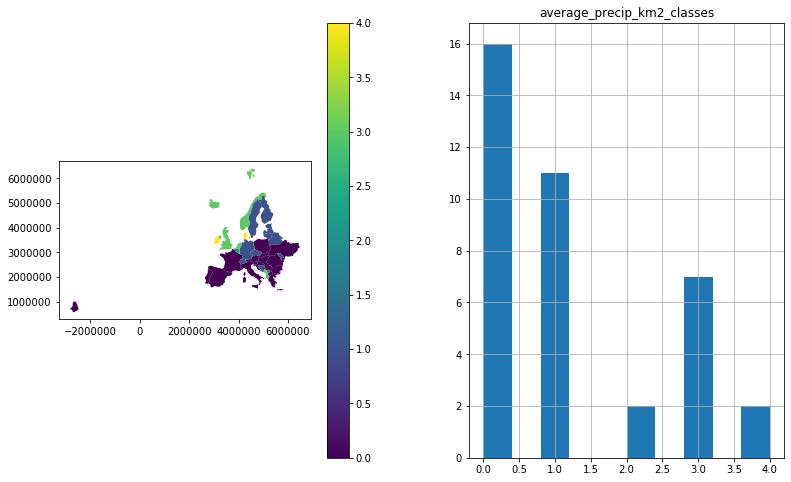

In [18]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe_3035.plot(ax=ax_dat, column="average_precip_km2_classes", cmap="viridis", legend=True)

europe_3035.hist(ax=ax_hist, column="average_precip_km2_classes")

plt.title("average_precip_km2_classes")

plt.show()

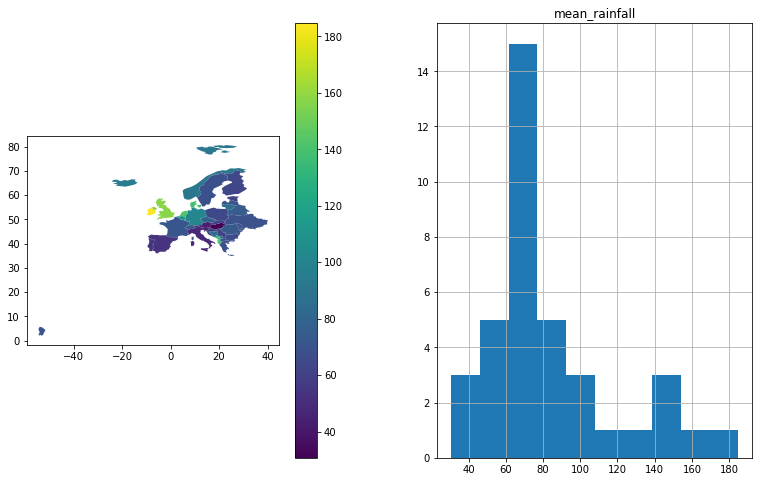

In [19]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe.plot(ax=ax_dat, column="mean_rainfall", cmap="viridis", legend=True)

europe.hist(ax=ax_hist, column="mean_rainfall")

plt.title("mean_rainfall")

plt.show()

In [20]:
# Classify the data
europe_3035['mean_rainfall_classes'] = europe_3035[['mean_rainfall']].apply(classifier)

# Let's see what we have
europe_3035.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,mean_rainfall,sum_rainfall,delta_rainfall,area_km2,average_precip_km2,average_precip_km2_classes,mean_rainfall_classes
0,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((4426956.698 6268775.764, 44311...",91.655894,160856.093750,616.140024,3.979478e+08,0.000404,3,2
1,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-2491399.942 667181.378, -2581...",71.980839,94294.898438,230.869995,6.448534e+08,0.000146,0,1
2,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((4380406.056 3973224.784, 4404509.373...",68.825202,96011.156250,145.470005,4.505641e+08,0.000213,1,1
3,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((5436932.506 3816251.143, 5507407.920...",75.828794,39430.972656,74.139999,2.089678e+08,0.000189,1,1
4,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((5788113.051 3443307.264, 5813713.255...",69.487122,87553.773438,226.550007,5.725399e+08,0.000153,0,1


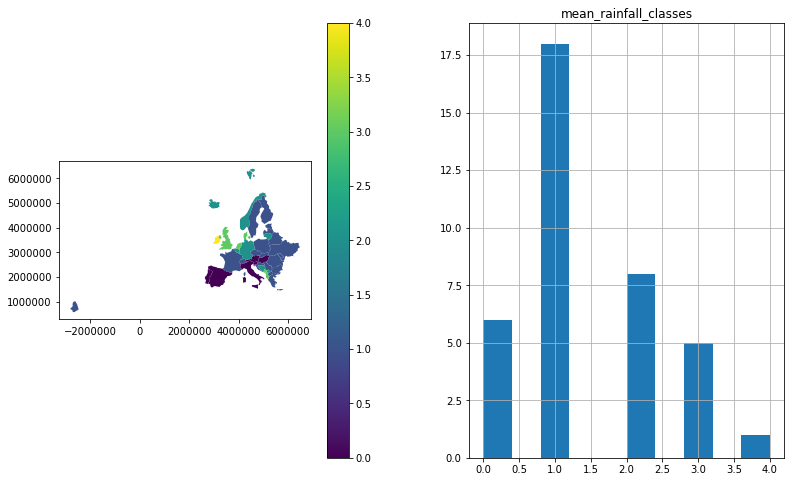

In [21]:
fig, (ax_dat, ax_hist) = plt.subplots(1, 2, figsize=(13,8))

europe_3035.plot(ax=ax_dat, column="mean_rainfall_classes", cmap="viridis", legend=True)

europe_3035.hist(ax=ax_hist, column="mean_rainfall_classes")

plt.title("mean_rainfall_classes")

plt.show()